In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from pylab import *

import h5py




from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Dropout, Activation, Permute,Concatenate
from tensorflow.keras.layers import Convolution1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Lambda
from tensorflow.keras import utils, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression

dim=2

In [3]:
# Data generation

In [4]:
dim=2


def find_W(x):
   # W=(x1[0]+1j*x1[1])*(y2[0]+1j*y2[1])-(x2[0]+1j*x2[1])*(y1[0]+1j*y1[1])
    W= -2.3*np.linalg.norm(x)**2+np.linalg.norm(x)**4
   # print(W)
    return W

def find_W_2(x,y):
   # W=(x1[0]+1j*x1[1])*(y2[0]+1j*y2[1])-(x2[0]+1j*x2[1])*(y1[0]+1j*y1[1])
    W= -(np.linalg.norm(np.abs(x))**2+np.linalg.norm(np.abs(y))**2)+0.25*(np.linalg.norm(np.abs(x))**2+np.linalg.norm(np.abs(y))**2)**2
   # print(W)
    return W

def add_point(W,min_re,max_re,class_W,data_train,cnt):
    dist_re=max_re-min_re
    step_size_re=dist_re/(classes)
    d1=np.random.uniform(-size_lattice,size_lattice,size=(dim))
    res=find_W(d1)
    bin_re=np.bincount(class_W[:],minlength=classes)
  #  bin_im=np.bincount(class_W[:,1],minlength=classes)
    for j_re in range(classes):
        if np.abs(np.real(res)-(j_re+0.5)*step_size_re-min_re)<error:
            if bin_re[j_re]<classes_max:
                W[cnt]=res
                class_W[cnt]=j_re
                data_train[cnt]=d1
                   #     data_train[cnt]=[d1[0,0,0],d1[0,0,1],d1[0,1,0],d1[0,1,1],d1[1,0,0],d1[1,0,1],d1[1,1,0],d1[1,1,1]]
                cnt=cnt+1
                break
            elif j_re==0:
                tr=np.random.uniform(0,100)
                if tr<3:
                    
                    W[cnt]=res
                    class_W[cnt]=j_re
                    data_train[cnt]=d1
                       #     data_train[cnt]=[d1[0,0,0],d1[0,0,1],d1[0,1,0],d1[0,1,1],d1[1,0,0],d1[1,0,1],d1[1,1,0],d1[1,1,1]]
                    cnt=cnt+1
                    break
    return W,class_W,data_train,cnt

size_lattice= 1.5
size_planned=int(10000)
size=size_planned
classes=11
classes_max=1000

error=1e-2

#lattice=np.arange(-size_lattice,size_lattice,0.01,size=8)

min_re=-1.1
max_re=1.1


dist_re=max_re-min_re
step_size_re=dist_re/(classes)

class_W=np.zeros((classes*classes_max),dtype=int)
W=np.zeros((classes*classes_max))
data_train=np.zeros((classes*classes_max,dim))


cnt=0


a=11
a5=np.zeros((a**dim,dim))

for i0 in range(a):
    for i1 in range(a):
       
           # print((i2*2-(a-1))/(a-1))
            pos=i1*a**1+i0
            a5[pos]=[(i0*2-(a-1))/(a-1),(i1*2-(a-1))/(a-1)]

x=a5
print(x)
W0=np.zeros((a**dim,dim))
for i in range(a**dim):
    res=find_W(x[i])
    W0[i]=res





for i in range(a**dim):
    W_re=W0[i,0]
    W_im=W0[i,1]
    if cnt == classes*classes_max:
        break
    for j_re in range(classes):
        if np.abs(W_re-(j_re+0.5)*step_size_re-min_re)<error:
            W[cnt]=W_re
            class_W[cnt]=j_re
            data_train[cnt]=x[i]
            cnt=cnt+1
            break
    #if i%10000==0:
     #   print(i/a**dim,cnt/(a**dim),i,cnt,i/cnt)
label_train=utils.to_categorical(class_W)
#print(np.sum(label_train,axis=0))
#print(x)




x=np.random.uniform(low=-size_lattice,high=size_lattice,size=(size_planned,dim))

W0=np.zeros((size))
for i in range(size):
    res=find_W(x[i])
    W0[i]=res

for i in range(size):
    W_re=W0[i]
    for j_re in range(classes):
            if np.abs(W_re-(j_re+0.5)*step_size_re-min_re)<error:
                W[cnt]=W_re
                class_W[cnt]=j_re
                data_train[cnt]=x[i]
                cnt=cnt+1
                break
    if i%100000==0:
        print(i/size)
    if cnt == classes*classes_max:
        break

label_train_re=utils.to_categorical(class_W[:])
#print(np.sum(label_train_re,axis=0))
#print(np.sum(label_train_re[:,1:]))

#print(cnt)
#print(np.min(W0))



while cnt<classes*classes_max:
    W,class_W,data_train,cnt=add_point(W,min_re,max_re,class_W,data_train,cnt)
    if cnt%1100==0:
        print(cnt/(classes*classes_max))
    if cnt/(classes*classes_max)>10.90:
            for i in range(size):
                W_re=W0[i]
                
                for j_re in range(classes):
                    if np.abs(W_re-(j_re+0.5)*step_size_re-min_re)<error:
                        W[cnt]=W_re
                        class_W[cnt]=j_re
                        data_train[cnt]=x[i]
                        cnt=cnt+1
                        break
                if i%200000==0:
                    print(i/size)
                if cnt == classes*classes_max:
                    break



a1=0
a2=0
b1=0
b2=0
sample=0
lattice=0
W0=0



label_train_re=utils.to_categorical(class_W[:],num_classes=classes)
#print(np.sum(label_train_re,axis=0))





[[-1.  -1. ]
 [-0.8 -1. ]
 [-0.6 -1. ]
 [-0.4 -1. ]
 [-0.2 -1. ]
 [ 0.  -1. ]
 [ 0.2 -1. ]
 [ 0.4 -1. ]
 [ 0.6 -1. ]
 [ 0.8 -1. ]
 [ 1.  -1. ]
 [-1.  -0.8]
 [-0.8 -0.8]
 [-0.6 -0.8]
 [-0.4 -0.8]
 [-0.2 -0.8]
 [ 0.  -0.8]
 [ 0.2 -0.8]
 [ 0.4 -0.8]
 [ 0.6 -0.8]
 [ 0.8 -0.8]
 [ 1.  -0.8]
 [-1.  -0.6]
 [-0.8 -0.6]
 [-0.6 -0.6]
 [-0.4 -0.6]
 [-0.2 -0.6]
 [ 0.  -0.6]
 [ 0.2 -0.6]
 [ 0.4 -0.6]
 [ 0.6 -0.6]
 [ 0.8 -0.6]
 [ 1.  -0.6]
 [-1.  -0.4]
 [-0.8 -0.4]
 [-0.6 -0.4]
 [-0.4 -0.4]
 [-0.2 -0.4]
 [ 0.  -0.4]
 [ 0.2 -0.4]
 [ 0.4 -0.4]
 [ 0.6 -0.4]
 [ 0.8 -0.4]
 [ 1.  -0.4]
 [-1.  -0.2]
 [-0.8 -0.2]
 [-0.6 -0.2]
 [-0.4 -0.2]
 [-0.2 -0.2]
 [ 0.  -0.2]
 [ 0.2 -0.2]
 [ 0.4 -0.2]
 [ 0.6 -0.2]
 [ 0.8 -0.2]
 [ 1.  -0.2]
 [-1.   0. ]
 [-0.8  0. ]
 [-0.6  0. ]
 [-0.4  0. ]
 [-0.2  0. ]
 [ 0.   0. ]
 [ 0.2  0. ]
 [ 0.4  0. ]
 [ 0.6  0. ]
 [ 0.8  0. ]
 [ 1.   0. ]
 [-1.   0.2]
 [-0.8  0.2]
 [-0.6  0.2]
 [-0.4  0.2]
 [-0.2  0.2]
 [ 0.   0.2]
 [ 0.2  0.2]
 [ 0.4  0.2]
 [ 0.6  0.2]
 [ 0.8  0.2]
 [ 1.   0.2]

In [5]:
width=80

input_points = Input(shape=(np.shape(data_train)[1],))

x=Dense(width,activation='relu',kernel_regularizer=regularizers.l2(0.00))(input_points)
#x=Dropout(rate=dropout1)(x)
#x=Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
x=Dense(width,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
x=Dense(width,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
#x=Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
x=Dense(width,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
x=Dense(width,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
#x=Dense(40,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)
#x=Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0000))(x)


#x=Dropout(rate=dropout1)(x)

#x=Dense(400,activation='relu')(x)
#x=BatchNormalization()(x)
#x=Dropout(rate=dropout1)(x)

#x=Dense(40,activation='relu',kernel_regularizer=regularizers.l2(0.00))(x)
#x=Dense(40,activation='relu',kernel_regularizer=regularizers.l2(0.00))(x)

#x=Dropout(rate=dropout1)(x)
#x=BatchNormalization()(x)

x=Dense(width,activation='relu',name="second_last_layer",kernel_regularizer=regularizers.l2(0.00))(x)
#x=BatchNormalization()(x)
#x=Dropout(rate=dropout1)(x)
x=Dense(width,name='embedding_layer',kernel_regularizer=regularizers.l2(0.001))(x)

output_re=Dense(classes, activation='softmax',name='Hodge_number1')(x)
#output_im=Dense(classes, activation='softmax',name='Hodge_number2')(x)





model = Model(inputs=input_points, outputs=output_re)


model.summary()




lr1=1.
decay1=0.
adam = optimizers.Adam(lr=lr1,decay=decay1)

# compile classification model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])





Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 80)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                6480      
_________________________________________________________________
second_last_layer (Dense)    (None, 80)               

In [6]:

for i in range(1,6):
    #model.fit(train_points_r, Y_train, batch_size=32, epochs=1, shuffle=True, verbose=1)
    # rotate and jitter the 4
    model.fit(x=data_train, y=label_train_re, batch_size=64, epochs=5, shuffle=True, 
             # callbacks=[reduce_lr,mcp_save],
              verbose=1)
    s = "Current epoch is:" + str(i)
    print(s)





Epoch 1/5
172/172 [==============================] - 0s 1ms/step - loss: 2.0796 - acc: 0.2007
Epoch 2/5
172/172 [==============================] - 0s 1ms/step - loss: 1.1617 - acc: 0.5545
Epoch 3/5
172/172 [==============================] - 0s 1ms/step - loss: 0.7843 - acc: 0.7255
Epoch 4/5
172/172 [==============================] - 0s 1ms/step - loss: 0.6270 - acc: 0.7684
Epoch 5/5
172/172 [==============================] - 0s 1ms/step - loss: 0.4655 - acc: 0.8737
Current epoch is:1
Epoch 1/5
172/172 [==============================] - 0s 1ms/step - loss: 0.4422 - acc: 0.8653
Epoch 2/5
172/172 [==============================] - 0s 1ms/step - loss: 0.4259 - acc: 0.8661
Epoch 3/5
172/172 [==============================] - 0s 1ms/step - loss: 0.4948 - acc: 0.8754
Epoch 4/5
172/172 [==============================] - 0s 1ms/step - loss: 0.1936 - acc: 0.9886
Epoch 5/5
172/172 [==============================] - 0s 1ms/step - loss: 0.5680 - acc: 0.8530
Current epoch is:2
Epoch 1/5
172/172 [===

In [7]:


predicted_data=model.predict(data_train)
list_cor_classes=np.zeros(classes*classes_max)
cnt=0

for i in range(classes*classes_max):
    dummy_0=predicted_data[i]
    if np.linalg.norm(dummy_0-label_train_re[i])<=2e-1:
        list_cor_classes[cnt]=i
        cnt=cnt+1
list_cor_class=list_cor_classes[0:cnt]
print(cnt)



data_train_mod=np.zeros((len(list_cor_class),np.shape(data_train)[1]))
class_W_mod=np.zeros((len(list_cor_class)),dtype=int)
W_mod=np.zeros((len(list_cor_class)))
for i in range(len(list_cor_class)):
    data_train_mod[i]=np.copy(data_train[int(list_cor_class[i])])
   # print(list_cor_class[i])
    W_mod[i]=np.copy(W[int(list_cor_class[i])])
    class_W_mod[i]=np.copy(class_W[int(list_cor_class[i])])




layer_name = 'embedding_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output3 = intermediate_layer_model.predict(data_train_mod)




11000


In [8]:
datasets=[]
perplexity_values=np.arange(80,120,10)
for i in perplexity_values:
    print(i)
    tsne=TSNE(n_components=2,perplexity=i,random_state=1)
    data=tsne.fit_transform(intermediate_output3)
    datasets.append(data)

80
90
100
110


In [9]:
datasets=[]
datasets.append(data)
datasets

[array([[-12.101197 ,  33.52951  ],
        [  3.3261423,  35.62253  ],
        [-18.886219 ,  58.99409  ],
        ...,
        [-60.96076  , -17.489405 ],
        [-62.546234 , -13.517285 ],
        [-54.830235 , -31.735332 ]], dtype=float32)]

In [10]:
class_W_mod

array([2, 2, 5, ..., 0, 0, 0])

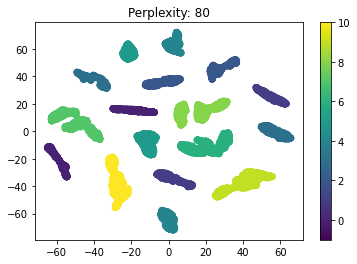

In [11]:
cmap = cm.get_cmap('viridis', 11)
for i in range(len(datasets)):
    plt.scatter(datasets[i][:,0],datasets[i][:,1],c=class_W_mod,cmap='viridis',vmax=10.,vmin=-1.0)
#plt.scatter(tsne_red_train[8597:8598,0],tsne_red_train[8597:8598,1],c='red')
#plt.scatter(data_train_mod[:,0],data_train_mod[:,1],c=class_W_mod)
    plt.colorbar()
    plt.title('Perplexity: '+str(perplexity_values[i]))
#plt.savefig(directory+'SO2_TSNE_all.pdf',dpi=72*8)
    plt.show()
    plt.close()

In [12]:
tsne=TSNE(n_components=2,perplexity=20)
tsne_red_train=tsne.fit_transform(intermediate_output3)

In [13]:
tsne=TSNE(n_components=2,perplexity=10)
tsne_red_train2=tsne.fit_transform(intermediate_output3)

In [14]:
tsne=TSNE(n_components=2,perplexity=50)
tsne_red_train3=tsne.fit_transform(intermediate_output3)